# Advanced Classical Methods

In [21]:
import json
from helper.ConfusionLoss import confusion_loss_from_labels
import matplotlib.pyplot as plt

with open("../data/articles/train.preprocessed.json") as f:
    data = json.load(f)
    texts = [" ".join(article) for article in data]

with open("../data/articles/train.json") as f:
    data = json.load(f)
    labels = [article["label"] for article in data]


While LDA is probably the most popular topic modeling algorithm, there are other methods that are worth knowing about. In this notebook, we will cover two of them: Non-negative Matrix Factorization (NMF) and Latent Semantic Indexing (LSI), also known as Latent Semantic Analysis (LSA).

Besides these two, you might also want to check out [Correlated Topic Models](https://proceedings.neurips.cc/paper_files/paper/2005/file/9e82757e9a1c12cb710ad680db11f6f1-Paper.pdf), which is very closely related to LDA, or [Structural Topic Model](https://www.structuraltopicmodel.com) for including meta-information..

## Non-negative Matrix Factorization

Non-negative Matrix Factorization (NMF) is a matrix factorization method that is often used for dimensionality reduction. It is similar to PCA, but it only works on non-negative matrices, which makes it suitable for sparse count data.

Given a matrix $X$, NMF finds two matrices $W$ and $H$ such that $X \approx WH$. $W$ and $H$ are constrained to be non-negative, and $H$ is also constrained to be sparse. The sparsity of $H$ makes NMF a good fit for topic modeling.

![NMF](../assets/graphics/nmf.png)

If we imagine $X$ to be a document-term matrix, e.g. TF-IDF, then $W$ can be interpreted as a document-topic matrix, and $H$ as a topic-term matrix. This is exactly what we need for topic modeling!

NMF, in contrast to LDA, has no hyperparameters except the number of topics. This makes it very easy to use, but it also means that it is less flexible than LDA. For example, it is not possible to use priors to influence the topic distribution.

NMF often produces more coherent topics than LDA, but it is also more prone to overfitting and hence more sensitive to the quality of the corpus and the preprocessing.

### NMF with Sklearn

The following code-snippet shows how to perform NMF with sklearn. The code is similar to the LDA code from the previous notebook.

Notice, how fast NMF is compared to LDA! We can perform NMF on the full dataset in less than 5 seconds, while LDA takes multiple minutes.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(max_df=0.75, min_df=10)
tfidf = vectorizer.fit_transform(texts)

nmf = NMF(n_components=8, random_state=42)
W = nmf.fit_transform(tfidf)
H = nmf.components_


Coherence score: 0.43


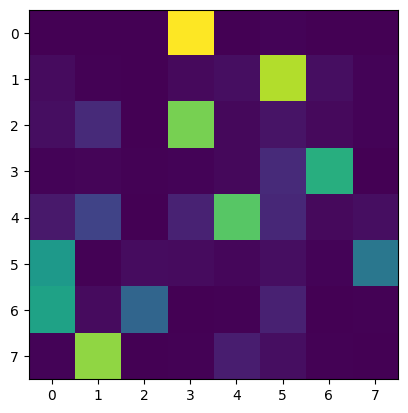

In [27]:
predicted_topics = W.argmax(axis=1)
score, confusion_matrix = confusion_loss_from_labels(labels, predicted_topics)

plt.imshow(confusion_matrix)
print(f"Coherence score: {score:.2f}")


The coherence-score of $0.43$ is not as good as LDA (or BERTopic, as we will see later), but still decent.

## Latent Semantic Analysis

Latent Semantic Analysis (LSA), also known as Latent Semantic Indexing (LSI), is a method that is very similar to PCA. It is often used for dimensionality reduction, but it can also be used for topic modeling.